In [2]:
# German Traffic Sign Recognition Project

In [3]:
# Step1 : Explore the Dataset

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('C:\July-2023-PGP BIg Data & Machine Learning-Great Learning\Data Science Projects_From builtin.com\German Traffic Sign Recognition\Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [10]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 130s 125ms/step - loss: 2.2396 - accuracy: 0.4192 - val_loss: 0.8347 - val_accuracy: 0.7804
Epoch 2/15
981/981 [==============================] - 117s 120ms/step - loss: 0.9652 - accuracy: 0.7097 - val_loss: 0.4309 - val_accuracy: 0.8748
Epoch 3/15
981/981 [==============================] - 118s 120ms/step - loss: 0.7131 - accuracy: 0.7831 - val_loss: 0.2990 - val_accuracy: 0.9130
Epoch 4/15
981/981 [==============================] - 121s 123ms/step - loss: 0.6069 - accuracy: 0.8142 - val_loss: 0.2643 - val_accuracy: 0.9212
Epoch 5/15
981/981 [==============================] - 128s 131ms/step - loss: 0.4858 - accuracy: 0.8520 - val_loss: 0.1925 - val_accuracy: 0.9383
Epoch 6/15
981/981 [==============================] - 123s 125ms/step - loss: 0.4170 - accuracy: 0.8710 - val_loss: 0.1780 - val_accuracy: 0.9444
Epoch 7/15
981/981 [==============================] - 133s 136ms/step - loss: 0.3611 - accuracy: 0.8898 - val_loss: 0.1493 -

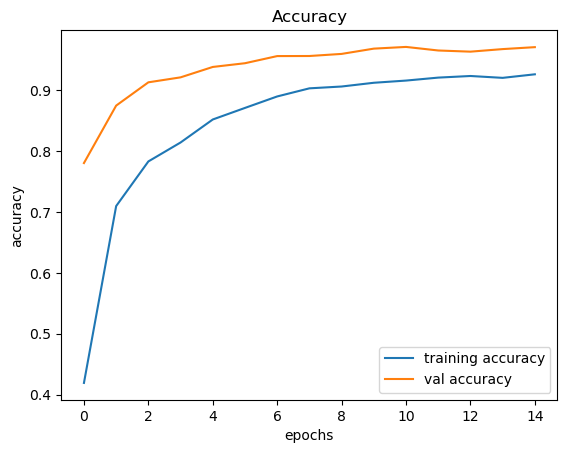

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

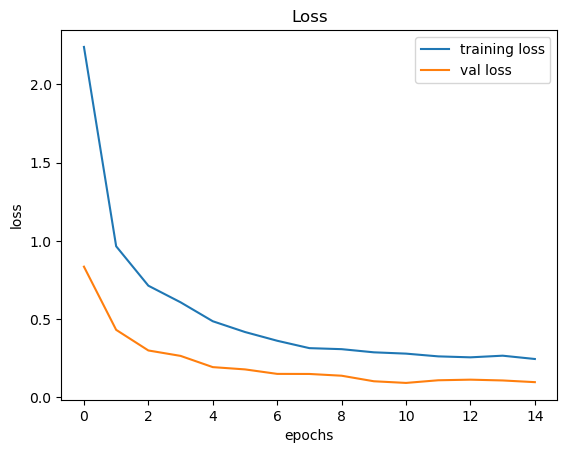

In [14]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [26]:
y_test.shape

(103, 8)

In [33]:
data=[]
for img in imgs:
    img = os.path.join('C:\July-2023-PGP BIg Data & Machine Learning-Great Learning\Data Science Projects_From builtin.com\German Traffic Sign Recognition',img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = (model.predict(X_test) > 0.5).astype("int32")
#predictions = (model.predict(x_test) > 0.5).astype("int32")
#Accuracy with the test data
from sklearn.metrics import accuracy_score
#print(accuracy_score(labels, pred))
# model.save(‘traffic_classifier.h5’)

4/4 [==============================] - 0s 26ms/step
